<a href="https://colab.research.google.com/github/suhashj/Machine-Learning-projects/blob/main/Prediction_On_Hospital_Readmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#using compatible libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, auc

In [2]:
#Import Files
train = pd.read_csv('Train-1617360447408-1660719685476.csv')
test = pd.read_csv('test-1617360461595-1660719701431.csv')

In [3]:
train.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [4]:
#percentage of nan in train data
train = train.replace('?',np.nan)
print((train.isnull().sum()/len(train))*100)

index                  0.000000
encounter_id           0.000000
patient_id             0.000000
race                   2.258699
gender                 0.000000
age                    0.000000
weight                96.796672
time_in_hospital       0.000000
medical_specialty     49.066635
num_lab_procedures     0.000000
num_procedures         0.000000
num_medications        0.000000
number_outpatient      0.000000
number_emergency       0.000000
number_inpatient       0.000000
diag_1                 0.022527
diag_2                 0.346915
diag_3                 1.432712
diag_4                 1.432712
diag_5                 0.000000
number_diagnoses       0.000000
X1                     0.000000
X2                     0.000000
X3                     0.000000
X4                     0.000000
X5                     0.000000
X6                     0.000000
X7                     0.000000
X8                     0.000000
X9                     0.000000
X10                    0.000000
X11     

In [5]:
#percentage of nan in test data
test = test.replace('?',np.nan)
print((test.isnull().sum()/len(test))*100)

index                  0.000000
encounter_id           0.000000
patient_id             0.000000
race                   2.228630
gender                 0.000000
age                    0.000000
weight                96.756172
time_in_hospital       0.000000
medical_specialty     48.543281
num_lab_procedures     0.000000
num_procedures         0.000000
num_medications        0.000000
number_outpatient      0.000000
number_emergency       0.000000
number_inpatient       0.000000
diag_1                 0.018021
diag_2                 0.378447
diag_3                 1.483751
diag_4                 1.483751
diag_5                 0.000000
number_diagnoses       0.000000
X1                     0.000000
X2                     0.000000
X3                     0.000000
X4                     0.000000
X5                     0.000000
X6                     0.000000
X7                     0.000000
X8                     0.000000
X9                     0.000000
X10                    0.000000
X11     

In [6]:
print("Train Rows :",len(train))
print("Test Rows :",len(test))
total_rows = len(train) + len(test)
print("Total Rows :",total_rows)

Train Rows : 66587
Test Rows : 16647
Total Rows : 83234


In [7]:
df = pd.concat([train, test], axis=0)

                       index  encounter_id  patient_id  time_in_hospital  \
index               1.000000      0.967746    0.530321         -0.069455   
encounter_id        0.967746      1.000000    0.515897         -0.065718   
patient_id          0.530321      0.515897    1.000000         -0.024560   
time_in_hospital   -0.069455     -0.065718   -0.024560          1.000000   
num_lab_procedures -0.024829     -0.026513    0.008258          0.317791   
num_procedures     -0.018229     -0.011833   -0.010764          0.189862   
num_medications     0.086206      0.079311    0.027329          0.466018   
number_outpatient   0.123406      0.110434    0.107852         -0.004403   
number_emergency    0.093911      0.083868    0.064268         -0.014538   
number_inpatient    0.038776      0.032505    0.010618          0.074129   
diag_5              0.010872      0.010133    0.001094         -0.001322   
number_diagnoses    0.280526      0.266711    0.228001          0.217898   
readmitted  

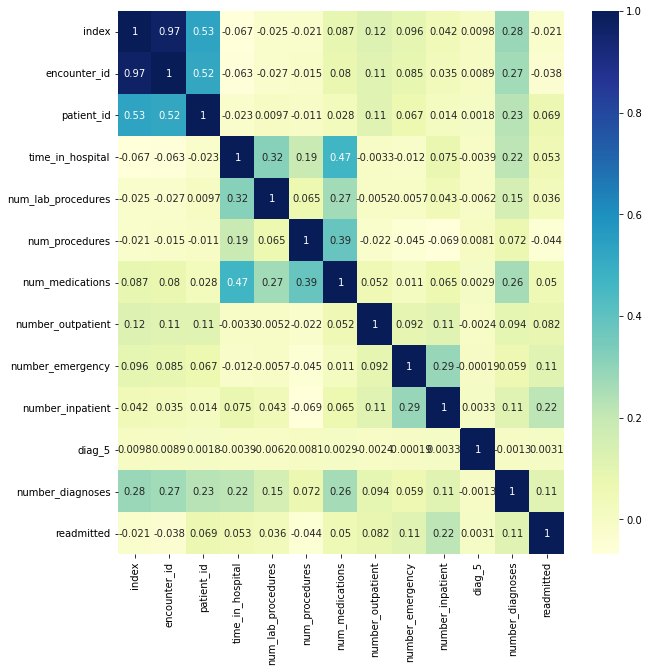

In [8]:
#Visualize with HeatMap
print(train.corr())
fig, ax = plt.subplots(figsize=(10,10))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [9]:
df.tail()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
16642,69643,198316824,71780013,Caucasian,Male,[70-80),NaN,3,Surgery-Vascular,51,...,No,Down,No,No,No,No,No,Ch,Yes,NaN
16643,29787,96993108,23318685,Caucasian,Male,[70-80),NaN,2,InternalMedicine,37,...,No,No,No,No,No,No,No,Ch,Yes,NaN
16644,44710,137896878,90856791,Caucasian,Female,[50-60),NaN,2,Family/GeneralPractice,14,...,No,No,No,No,No,No,No,No,No,NaN
16645,28486,93395658,3233259,NaN,Male,[70-80),NaN,1,NaN,35,...,No,No,No,No,No,No,No,No,Yes,NaN
16646,39179,121984746,41817384,Caucasian,Female,[80-90),NaN,1,Cardiology,13,...,No,No,No,No,No,No,No,No,Yes,NaN


In [10]:
print("Length of Data Frames :",len(df))

Length of Data Frames : 83234


In [11]:
df = df.replace('?',np.nan)
df.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),NaN,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1.0
1,57272,163571946,92631357,Caucasian,Male,[60-70),NaN,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0.0
2,82347,256497366,30023982,Caucasian,Female,[50-60),NaN,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1.0
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),NaN,5,NaN,63,...,No,Down,No,No,No,No,No,Ch,Yes,1.0
4,24091,81873900,23464296,Caucasian,Male,[70-80),NaN,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1.0


In [12]:
print((df.isnull().sum()/total_rows)*100)

index                  0.000000
encounter_id           0.000000
patient_id             0.000000
race                   2.252685
gender                 0.000000
age                    0.000000
weight                96.788572
time_in_hospital       0.000000
medical_specialty     48.961963
num_lab_procedures     0.000000
num_procedures         0.000000
num_medications        0.000000
number_outpatient      0.000000
number_emergency       0.000000
number_inpatient       0.000000
diag_1                 0.021626
diag_2                 0.353221
diag_3                 1.442920
diag_4                 1.442920
diag_5                 0.000000
number_diagnoses       0.000000
X1                     0.000000
X2                     0.000000
X3                     0.000000
X4                     0.000000
X5                     0.000000
X6                     0.000000
X7                     0.000000
X8                     0.000000
X9                     0.000000
X10                    0.000000
X11     

In [13]:
#removing column having more 'nan' than 25% as being inefficient for our prediction
df = df.drop(columns=['weight', 'medical_specialty'])


In [14]:
df.head(10)

,index,encounter_id,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),4,39,1,9,...,No,No,No,No,No,No,No,No,Yes,1.0
1,57272,163571946,92631357,Caucasian,Male,[60-70),3,34,1,12,...,No,No,No,No,No,No,No,No,No,0.0
2,82347,256497366,30023982,Caucasian,Female,[50-60),6,50,2,24,...,No,Down,No,No,No,No,No,Ch,Yes,1.0
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),5,63,0,14,...,No,Down,No,No,No,No,No,Ch,Yes,1.0
4,24091,81873900,23464296,Caucasian,Male,[70-80),9,17,1,11,...,No,No,No,No,No,No,No,No,No,1.0
5,11756,48391902,29635362,AfricanAmerican,Male,[40-50),3,43,3,13,...,No,Down,No,No,No,No,No,Ch,Yes,0.0
6,42376,130669056,35476317,Caucasian,Male,[70-80),9,1,4,14,...,No,No,No,No,No,No,No,No,No,0.0
7,91744,313193054,171347630,Caucasian,Female,[40-50),4,15,3,17,...,No,No,No,No,No,No,No,No,No,0.0
8,27014,88645302,20811105,Caucasian,Female,[70-80),13,70,5,32,...,No,No,No,No,No,No,No,No,Yes,0.0
9,95964,369018230,115650671,Caucasian,Male,[70-80),3,63,6,28,...,No,No,No,No,No,No,No,No,No,0.0


In [15]:
#now deleting useless ID of patient which is used for hospital system but is irrelevent to our dataset prediction
df = df.drop(columns=['index', 'encounter_id','patient_id'])
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,Hispanic,Male,[80-90),4,39,1,9,1,1,4,...,No,No,No,No,No,No,No,No,Yes,1.0
1,Caucasian,Male,[60-70),3,34,1,12,0,0,0,...,No,No,No,No,No,No,No,No,No,0.0
2,Caucasian,Female,[50-60),6,50,2,24,0,0,5,...,No,Down,No,No,No,No,No,Ch,Yes,1.0
3,AfricanAmerican,Female,[70-80),5,63,0,14,0,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,1.0
4,Caucasian,Male,[70-80),9,17,1,11,0,0,0,...,No,No,No,No,No,No,No,No,No,1.0


In [16]:
#dropping the dosage x1:x25
df = df.drop(columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24','X25'])
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,diag_4,diag_5,number_diagnoses,change,diabetesMed,readmitted
0,Hispanic,Male,[80-90),4,39,1,9,1,1,4,783,403,585,585,32.970966,9,No,Yes,1.0
1,Caucasian,Male,[60-70),3,34,1,12,0,0,0,564,788,569,569,94.116731,6,No,No,0.0
2,Caucasian,Female,[50-60),6,50,2,24,0,0,5,574,403,585,585,64.138297,9,Ch,Yes,1.0
3,AfricanAmerican,Female,[70-80),5,63,0,14,0,0,0,401,783,250,250,13.832428,7,Ch,Yes,1.0
4,Caucasian,Male,[70-80),9,17,1,11,0,0,0,311,276,300,300,82.898368,9,No,No,1.0


In [17]:
df = df.drop(columns=['diag_1','diag_2','diag_3','diag_4','diag_5'])
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted
0,Hispanic,Male,[80-90),4,39,1,9,1,1,4,9,No,Yes,1.0
1,Caucasian,Male,[60-70),3,34,1,12,0,0,0,6,No,No,0.0
2,Caucasian,Female,[50-60),6,50,2,24,0,0,5,9,Ch,Yes,1.0
3,AfricanAmerican,Female,[70-80),5,63,0,14,0,0,0,7,Ch,Yes,1.0
4,Caucasian,Male,[70-80),9,17,1,11,0,0,0,9,No,No,1.0


In [18]:
print((df.isnull().sum()/total_rows)*100)

race                   2.252685
gender                 0.000000
age                    0.000000
time_in_hospital       0.000000
num_lab_procedures     0.000000
num_procedures         0.000000
num_medications        0.000000
number_outpatient      0.000000
number_emergency       0.000000
number_inpatient       0.000000
number_diagnoses       0.000000
change                 0.000000
diabetesMed            0.000000
readmitted            20.000240
dtype: float64


In [19]:
df.race.unique()

array(['Hispanic', 'Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian'],
      dtype=object)

In [20]:
#handling missing values in race
df['race'].fillna(df['race'].mode()[0], inplace=True)
df.race.isnull().sum()

0

In [21]:
#handling age
df.groupby('age').size()


age
[0-10)        118
[10-20)       551
[20-30)      1443
[30-40)      3029
[40-50)      7952
[50-60)     14217
[60-70)     18571
[70-80)     21231
[80-90)     13861
[90-100)     2261
dtype: int64

In [22]:
age_id = {'[0-10)':0, 
          '[10-20)':10, 
          '[20-30)':20, 
          '[30-40)':30, 
          '[40-50)':40, 
          '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90}
df['age_group'] = df.age.replace(age_id)
df.head() 

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,age_group
0,Hispanic,Male,[80-90),4,39,1,9,1,1,4,9,No,Yes,1.0,80
1,Caucasian,Male,[60-70),3,34,1,12,0,0,0,6,No,No,0.0,60
2,Caucasian,Female,[50-60),6,50,2,24,0,0,5,9,Ch,Yes,1.0,50
3,AfricanAmerican,Female,[70-80),5,63,0,14,0,0,0,7,Ch,Yes,1.0,70
4,Caucasian,Male,[70-80),9,17,1,11,0,0,0,9,No,No,1.0,70


In [23]:
df = df.drop(columns=['age'])
df.head()

,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,age_group
0,Hispanic,Male,4,39,1,9,1,1,4,9,No,Yes,1.0,80
1,Caucasian,Male,3,34,1,12,0,0,0,6,No,No,0.0,60
2,Caucasian,Female,6,50,2,24,0,0,5,9,Ch,Yes,1.0,50
3,AfricanAmerican,Female,5,63,0,14,0,0,0,7,Ch,Yes,1.0,70
4,Caucasian,Male,9,17,1,11,0,0,0,9,No,No,1.0,70


In [24]:
#final check for na
print((df.isnull().sum()/total_rows)*100)

race                   0.00000
gender                 0.00000
time_in_hospital       0.00000
num_lab_procedures     0.00000
num_procedures         0.00000
num_medications        0.00000
number_outpatient      0.00000
number_emergency       0.00000
number_inpatient       0.00000
number_diagnoses       0.00000
change                 0.00000
diabetesMed            0.00000
readmitted            20.00024
age_group              0.00000
dtype: float64


In [25]:
df_1 = df.iloc[:66587,:]
df_2 = df.iloc[66587:,:]
print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))
print(len(train),len(test))

Shape of new dataframes - (66587, 14) , (16647, 14)
66587 16647


In [26]:
print((df_1.isnull().sum()/len(df_1))*100)

race                  0.0
gender                0.0
time_in_hospital      0.0
num_lab_procedures    0.0
num_procedures        0.0
num_medications       0.0
number_outpatient     0.0
number_emergency      0.0
number_inpatient      0.0
number_diagnoses      0.0
change                0.0
diabetesMed           0.0
readmitted            0.0
age_group             0.0
dtype: float64


In [27]:
df_2 = df_2.drop(columns=['readmitted'])
print((df_2.isnull().sum()/len(df_2))*100)

race                  0.0
gender                0.0
time_in_hospital      0.0
num_lab_procedures    0.0
num_procedures        0.0
num_medications       0.0
number_outpatient     0.0
number_emergency      0.0
number_inpatient      0.0
number_diagnoses      0.0
change                0.0
diabetesMed           0.0
age_group             0.0
dtype: float64


In [28]:
#handling the Readmitted data by imputing it
df_1['readmitted'] = pd.to_numeric(df_1['readmitted'])
df_1['readmitted'] = df_1['readmitted'].fillna(df_1['readmitted'].median())
df_1['readmitted'].isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

In [29]:
#check for Datatytype to convert
df_1.dtypes

race                   object
gender                 object
time_in_hospital        int64
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
number_diagnoses        int64
change                 object
diabetesMed            object
readmitted            float64
age_group               int64
dtype: object

In [30]:
df_1.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,age_group
count,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000
mean,4.397510,43.115533,1.331521,16.028744,0.365672,0.200460,0.637602,7.424948,0.462012,60.910989
std,2.980995,19.630417,1.705746,8.125304,1.221861,0.905503,1.255487,1.933061,0.498559,15.905823
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,50.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,60.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,70.000000
max,14.000000,129.000000,6.000000,81.000000,39.000000,63.000000,19.000000,16.000000,1.000000,90.000000


In [31]:
df_2.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_group
count,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000
mean,4.366132,43.055866,1.344206,15.954646,0.367093,0.196972,0.633267,7.398630,60.737070
std,2.950424,19.623995,1.706926,8.093555,1.265388,0.782756,1.243029,1.949511,15.944485
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,50.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,60.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,70.000000
max,14.000000,109.000000,6.000000,81.000000,39.000000,20.000000,16.000000,16.000000,90.000000


In [32]:
#Enclding values in race
label_encoder = preprocessing.LabelEncoder()

df_1['race']= label_encoder.fit_transform(df_1['race'])
df_1['race'].unique()

df_2['race']= label_encoder.fit_transform(df_2['race'])
df_2['race'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([2, 0, 1, 3, 4])

In [33]:
#Encoding values in gender
df_1['gender']= label_encoder.fit_transform(df_1['gender'])
df_1['gender'].unique()

df_2['gender']= label_encoder.fit_transform(df_2['gender'])
df_2['gender'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0, 1, 2])

In [34]:
#Encoding values in change
df_1['change']= label_encoder.fit_transform(df_1['change'])  
df_1['change'].unique()

df_2['change']= label_encoder.fit_transform(df_2['change'])  
df_2['change'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1, 0])

In [35]:
#Encoding values in diabetesMed
df_1['diabetesMed']= label_encoder.fit_transform(df_1['diabetesMed'])  
df_1['diabetesMed'].unique()

df_2['diabetesMed']= label_encoder.fit_transform(df_2['diabetesMed'])  
df_2['diabetesMed'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1, 0])

In [36]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66587 entries, 0 to 66586
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   race                66587 non-null  int64  
 1   gender              66587 non-null  int64  
 2   time_in_hospital    66587 non-null  int64  
 3   num_lab_procedures  66587 non-null  int64  
 4   num_procedures      66587 non-null  int64  
 5   num_medications     66587 non-null  int64  
 6   number_outpatient   66587 non-null  int64  
 7   number_emergency    66587 non-null  int64  
 8   number_inpatient    66587 non-null  int64  
 9   number_diagnoses    66587 non-null  int64  
 10  change              66587 non-null  int64  
 11  diabetesMed         66587 non-null  int64  
 12  readmitted          66587 non-null  float64
 13  age_group           66587 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.6 MB


In [37]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16647 entries, 0 to 16646
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   race                16647 non-null  int64
 1   gender              16647 non-null  int64
 2   time_in_hospital    16647 non-null  int64
 3   num_lab_procedures  16647 non-null  int64
 4   num_procedures      16647 non-null  int64
 5   num_medications     16647 non-null  int64
 6   number_outpatient   16647 non-null  int64
 7   number_emergency    16647 non-null  int64
 8   number_inpatient    16647 non-null  int64
 9   number_diagnoses    16647 non-null  int64
 10  change              16647 non-null  int64
 11  diabetesMed         16647 non-null  int64
 12  age_group           16647 non-null  int64
dtypes: int64(13)
memory usage: 1.8 MB


In [38]:
df_1.head()

,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,age_group
0,3,1,4,39,1,9,1,1,4,9,1,1,1.0,80
1,2,1,3,34,1,12,0,0,0,6,1,0,0.0,60
2,2,0,6,50,2,24,0,0,5,9,0,1,1.0,50
3,0,0,5,63,0,14,0,0,0,7,0,1,1.0,70
4,2,1,9,17,1,11,0,0,0,9,1,0,1.0,70


In [39]:
df_2.head()

,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,age_group
0,2,0,3,45,3,10,0,0,1,8,1,1,70
1,2,1,2,10,1,16,1,0,0,5,1,1,60
2,0,1,11,41,1,15,0,0,1,9,1,1,70
3,2,0,1,71,2,11,0,0,0,9,1,0,70
4,0,0,7,59,2,18,0,0,0,7,0,1,50


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


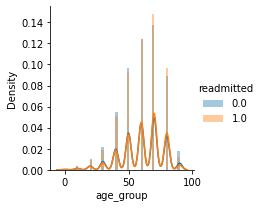

In [40]:
#mapping readmitted and age_group

sns.FacetGrid(df_1, hue = "readmitted").map(sns.distplot, "age_group").add_legend()
plt.show()

#here people who are readmitted are of an average age_group of 70

In [41]:
df_1_X = df_1.drop(columns=['readmitted'])
df_1_y = df_1.iloc[:,12:13]

In [42]:
df_1_X.head()

,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,age_group
0,3,1,4,39,1,9,1,1,4,9,1,1,80
1,2,1,3,34,1,12,0,0,0,6,1,0,60
2,2,0,6,50,2,24,0,0,5,9,0,1,50
3,0,0,5,63,0,14,0,0,0,7,0,1,70
4,2,1,9,17,1,11,0,0,0,9,1,0,70


In [43]:
df_1_y.head()

,readmitted
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [44]:
#SVC Model Creation
from sklearn.svm import SVC
X_train, X_test,y_train, y_test = train_test_split(df_1_X, df_1_y, test_size = 0.2, random_state = 123)
#linear_svm = SVC(kernel='linear')
#linear_svm = linear_svm.fit(X=X_train, y= y_train)
#linear_svm.support_vectors_

In [ ]:
train_predictions = linear_svm.predict(X_train)
test_predictions = linear_svm.predict(X_test)

In [ ]:
print("Accuracy on training set: {:.3f}".format(linear_svm.score(X_train, y_train)*100))
print("Accuracy on testing set: {:.3f}".format(linear_svm.score(X_test, y_test)*100))

In [45]:
print(classification_report(y_train, train_predictions))

NameError: ignored

In [ ]:
predictions = linear_svm.predict(df_2)


In [ ]:
print(len(predictions))
predictions.dtype

In [ ]:
final_1 = test.iloc[:,1:2]
final_2 = pd.DataFrame(predictions,columns = ['predictions'])
result = pd.concat([final_1, final_2], axis=1)

result.to_csv('/content/drive/MyDrive/Machine Learning/MLMiTH/SVM.csv',index=False)


In [46]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(max_depth=8,class_weight='balanced')
rf1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(class_weight='balanced', max_depth=8)

In [47]:
#predict with train and test sample data
y_train_pred = rf1.predict(X_train)
y_test_pred = rf1.predict(X_test)

In [48]:
#Check Accuracy
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.638
Accuracy on testing set: 0.625


In [49]:
#predicting with test data
predictions_rfc = rf1.predict(df_2)
print(predictions_rfc)

[1. 0. 1. ... 1. 0. 0.]


In [51]:
#save to .csv file
final_1 = test.iloc[:,1:2]
final_2 = pd.DataFrame(predictions_rfc,columns = ['predictions'])
result = pd.concat([final_1, final_2], axis=1)

result.to_csv('Results',index=False)

In [56]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Scores: [0.62680683 0.62342782 0.62117515 0.62718228 0.6183593  0.62417871
 0.62342782 0.62793317 0.63769476 0.62467142]
Mean: 0.6254857268898669
Standard Deviation: 0.004897780376390732
